# Time Series Analysis

### 시계열 자료
* 시계열(time-series)은 **시간의 순서에 따라**, 기록된 이렬의 데이터 점
* 대부분 **연속된 동일한 시간 간격**에서 측정된 수열이다.
* 예시로는 파도의 높이, 태양 흑점의 수, 주식의 일일 종가 등

### 시계열 분석
#### 목표
* 시계열 분석은 데이터로부터 의미있는 통계 또는 특징을 추출하여 **미래의 값을 예측**
* 시계열분석은 단일 시계열 또는 서로 다른 시점에서 종속된 시계열 값을 비교하는데 초점이 있다.
* 시계열 자료의 특성인
    1. 정상성(stationary) -> 과거와 미래가 확률적으로 동일하다! 라는 느낌 (패턴말고 "확률"이 동일!)
    > 예를 들어 평균이 일정하여 분산이 존재하는데 상수이고 두 시점 사이의 자기 공분산은 시차에만 의존한다.<p>
    > 공분산 : $ Cov(X,Y) = E[[(X-E(X)][Y-E(Y)]]$ -> 2개의 확률변수의 선형관계의 정도를 나타낸것.<p>
    > 자기공분산 : 서로 다른 2개의 시간에 대한 변수의 공분산 -> 시점 1: $T_1$과 시점 2: $T_2$의 관계의 정도 -> 추후에 더 상세히 설명
    2. 비정상성(non-stationary)
    3. 계절성(Seasonal)
    4. 추세(Trend)
* 특성들을 분석하여 적절하게 모델링을 한다.

### 1.1 시계열 분석의 개념

#### 시계열 자료와 시계열 분석
* 시계열 자료: 동일한 시간간격(fixed time interval)으로 이루어진 벡터로싸, 특징은 시계열 자료들이 **독립이 아니라** 상호연관 되어 있다.
    * 이산시계열(discrete time series): 일정한 시간 간격에 따라 생성 ex) 주가(분, 시간) -> 이놈을 주로 본다.
    * 연속시계열(continuous time series): ex) 주가(tick)
    > "Sampling" a continuous time series laeds to a distcrete time series. <p>
    > Time Series data are usually not independent, especially if sampling interval is **small**.
* 시점 $t_1, t_2, t_3,...,t_n$에서 관측된 이산 시계열을 $Y_1, Y_2, Y_3,...,Y_n$이라 하자.


#### 시계열 분석의 목적
1. Modeling : 시계열 자료의 구조(계절성, trend) 파악
2. Forecasting : (예측) 분석대상을 시계열자료의 구조와 특성을 토대로 미래 예측
3. Control : 생성된 시스템(Model)을 제어(Testing)

* **시계열자료의 특성: 서로 Correlated**

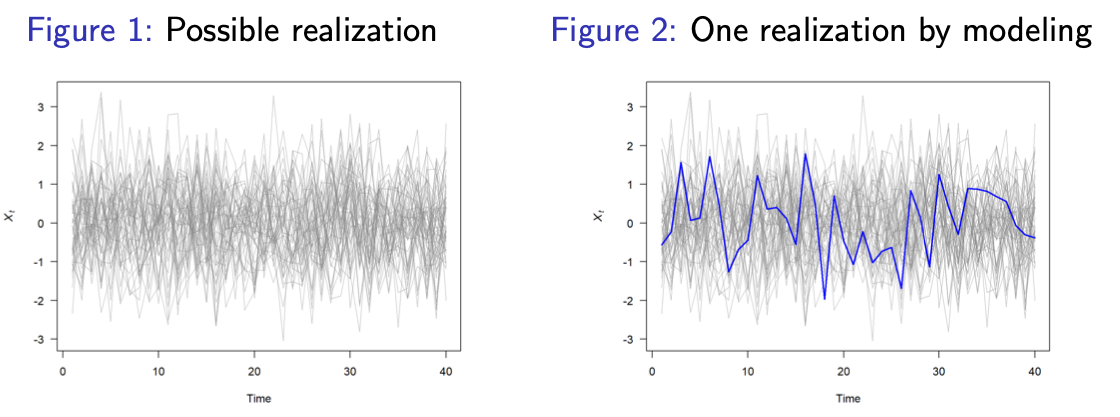

In [1]:
import random

from IPython import display
display.Image("../image/1-1.png")

#### Types of TS data
* Univariate - single series
* Multivariate - two or more series(vector time series)
* Time interval - yearly, monthly, weekly, daily, minute,.... every k nanonseconds...

#### Resons for Analying Time Series
* Description of features (level(mean), trend, cycles,....)
* Prediction
* Explanation Explanatory variables; Caues and effect Granger causility

#### 시계열 분석의 절차

1. 시계열자료를 적합시킬 수 있는 이론적인 수학적 모형 선택
2. 모형의 모수를 추정
3. 자료의 적합성 검토 by 잔차분석 등등
4. 만족할만한 모형이 발견되었다면
5. 미레의 값 예측

#### 시계열 분석의 주요한 3가지 개념
1. 추세(Trend)
2. 연속 의존성(seriel dependence)
3. 정상성(stationary)

### 1.2 시계열 자료의 형태


#### 1. Random Variation Time Series

* 시계열 자료가 일정 수준에 머무르면서
* 우연변동(Random variation) 또는 기저변동(Underlying variation)에 의한 변화만 나타나는 경우
*  $ Y_t = α + e_t ,  e_t \sim N(0,σ^2)$

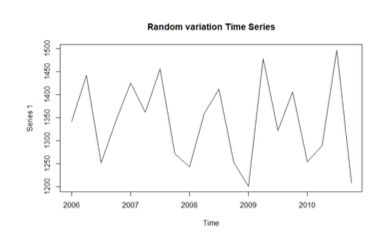

In [34]:
display.Image("../image/1-Random.png")

#### 2. Seasonal Variation Time Series
* 주기적 셩격의 계절성 변동에 의한 요인, 주기적 변화를 나타내는 형태
*  $f$:주기 ,$S_t$:계절변동, $\alpha, \beta$:미지의 모수
* $ y_t = S_t + e_t$
* $y_t = \alpha + \beta_1 \sin\!\Bigl(\tfrac{2\pi t}{f}\Bigr) + \beta \cos\!\Bigl(\tfrac{2\pi t}{f}\Bigr)+ e_t$




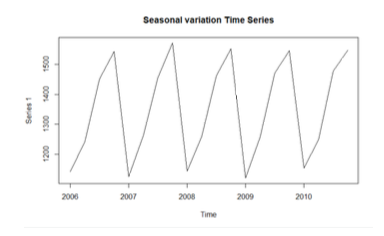

In [36]:
display.Image("../image/1-Season.png")

#### 3. Trend Variation Time Series
* 시간에 따라 증가하거나 또는 감소하는 형태
* $T_t$:추세변동
* $Y_t = T_t + e_t$
* $Y_t = α + βt + e_t$

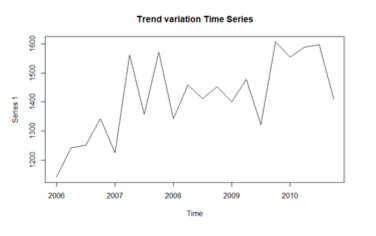

In [37]:
display.Image("../image/1-Trend.png")

* Trend Variation Time Series와 같은 경우 시계열자료에서 Trend를 빼주고 Random variation이나 Seasonal model로 분석을 진행한다.
*  위의 형태의 시계열을 혼합한 계절적 추세변동 시계열, 순환 시계열도 있다.

### 2. 시계열 자료의 예측 오차와 평가

#### 예측 오차의 종류

* 예측 오차는 예측 방법의 신뢰성(Reliability)를 평가하는 기준
$$
e_t = Y_t - \hat{Y_t}
$$
* 시계열 자료를 $Y_t$라 하고, 예측값을 $\hat{Y_t}$ 라고 할때
일반적으로 RMSE(Root Mean of squared errors)를 가장 많이 이용한다.
$$
\mathrm{RMSE} = \sqrt{\frac{1}{n}\sum_{t=1}^{n} e_t^2}
$$
* 또 다른 많은 예측 오차는 교재를 참고하자..

> 중요!<p>
> 1. 모델을 평가할때 예측 오차는 여러개로 비교한다. <p>
> 2. 예측 오차로 얻는 모델은 **주어진 상황**에서 best Model인 것을 명심하자..

### 3. 시계열 자료의 상관분석 (Correlation of Time Series Data)


* 시계열 자료 특성상 인접한 시점끼리의 data는 Correlation이 매우 높다! (독립이 아니다)
* 즉, 기존에 배운 많은 통계 모형 검정을 사용하지 못한다.

#### 정상성(Stationary)

* 시계열 자료의 정상성은 시계열 자료의 **확률적 성질이 시간에 따라 일정하다** 라는 것을 의미한다 -> 모델링이 가능하고 예측도 가능
* 시계열의 수준(level, mean, trend)과 분산에 쳬계적인 변화가 없고, 엄밀하게 주기적인 변동이 없음을 의미한다.
* 즉, 미래는 **확률적으로 과거와 동일**하다.
> 미래가 과거와 똑같이 나온다는 말이 아니라 -> 미래가 동일한 확률 분포에서 나온다! 라는 뜻 <p>
> 시계열을 만들어내는 통계적 메커니즘(평균, 분산, 자기상관)은 시간에 따라 바뀌지 않는다! 라는 뜻 <p>
> 정리하자면, 정상성을 만족하는 시계열은 앞으로도 미래가 과거와 유사한 패턴이 유지된다! 라고 할 수 있다.

#### 정상시계열
* 시계열 자료의 평균과 공분산이 변화하지 않고 균형적으로 변동하는 경우

1. 시계열 자료의 모든 시간 $t$에 대하여, **평균(수준)이 일정**
$$
E(Y_t) = \mu_t = \mu : \text{모든 시점에서 평균 일정!}
$$
2. 시계열 자료의 모든 시간 $t$에 대하여, **분산이 일정**
$$
Var(Y_t) = \sigma_t^2 = σ^2
$$
> 즉!!!! 평균, 분산은 t에 대한 함수가 아니다!!!!
3. 시계열 자료 $Y_{t1}, Y_{t2}$의 자기상관함수(ACF:Autocorrelation Function) 및 편자기상관함수(PACF: Partial ACF)는 시간 $t_1, t_2$에만 의존
> ACF : 본인 스스로의 correlation => 즉, 기존 "변수 간의" correlation이 아닌 "내 스스로(나의 데이터 시점 간)"의 Correlation을 본다!

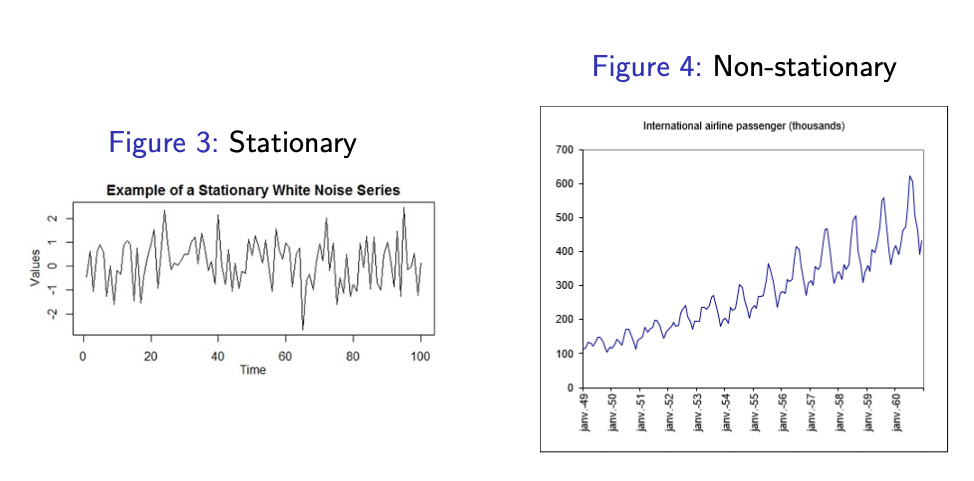

In [2]:
display.Image("../image/1-2.png")

* 좌측의 시계열은 평균, 분산이 일정하고 시간 $t$에 의존하지 않는다.
* 반면, 우측 시계열은 평균, 분산이 시간 $t$에 따라 증가한다.

#### 정상성(stationary)의 확인

* ACF와 PACF 등 2개의 지표를 통해 확인한다.
* ACF : 시점에 따라 다른 조사값들 사이의 상호연관관계를 나타낸다.
* PACF: 산성하고자 하는 연속적인 2개의 시계열을 구할때, 이 두 변수를 제외한 모든 변수의 영향을 제거한 상태에서 상관계수 선성
> if $t_1, t_4$를 계산하면, <p>
> 1 시점 4 시점 사이의 $t_2, t_3$를 제외하고 산성
* 검정: KPSS test (추후에 나옴..)
$$
H_0 : \text{주어진 시계열 자료가 정상성을 갖는다.}
$$

#### 백색잡음(White Noise) 예제 : Random variation

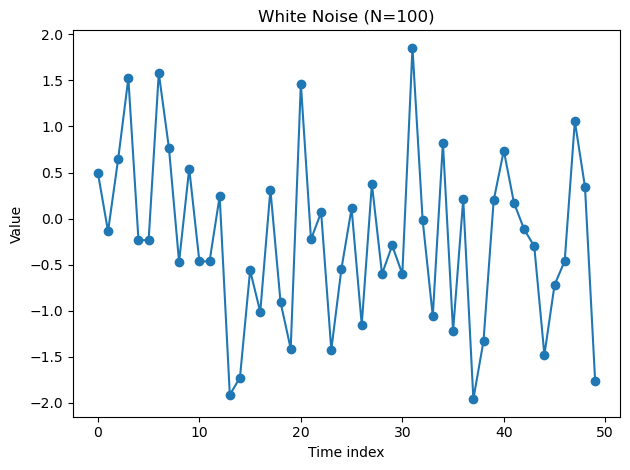

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 50
white_noise = np.random.normal(loc=0.0, scale=1.0, size=N)

# 시각화
plt.plot(white_noise, marker='o', linestyle='-')
plt.title('White Noise (N=100)')
plt.xlabel('Time index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

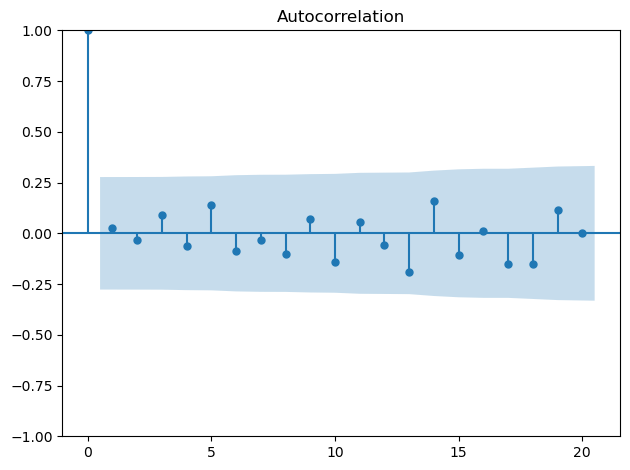

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(white_noise, lags=20)
plt.tight_layout()

* lag 0 : $corr(Y_t, Y_t)$이니깐 당연히 1이고
* 다른 시차를 보면 전반적으로 파란색의 유의수준 안에 포함되어 있음.

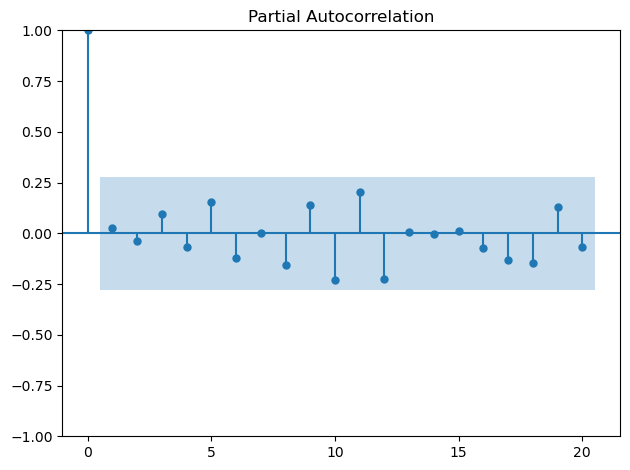

In [32]:
plot_pacf(white_noise, lags=20)
plt.tight_layout()

* PACF 그래프 또한 유의수준 안에 포함되므로
* Random variation 즉, white noise는 Stationary한 시계열임을 알 수 있다..!